In [3]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 72.6 kB/s eta 0:08:55
   ---------------------------------------- 0.0/38.8 MB 140.3 kB/s eta 0:04:37
   ---------------------------------------- 0.1/38.8 MB 192.5 kB/s eta 0:03:22
   ---------------------------------------- 0.1/38.8 MB 344.8 kB/s eta 0:01:53
   ---------------------------------------- 0.1/38.8 MB 327.4 kB/s eta 0:01:59
   ---------------------------------------- 0.1/38.8 MB 370.8 kB/s eta 0:01:45
   ---------------------------------------- 0.2/38.8 MB 444.2 kB/s eta 0:01:27
   ---------------

In [108]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [126]:
data_dir = r"C:\Users\Rangesh\Downloads\archive"
train_path = r"C:\Users\Rangesh\Downloads\archive\Train"
test_path = r"C:\Users\Rangesh\Downloads\archive\Test"

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [128]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [130]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

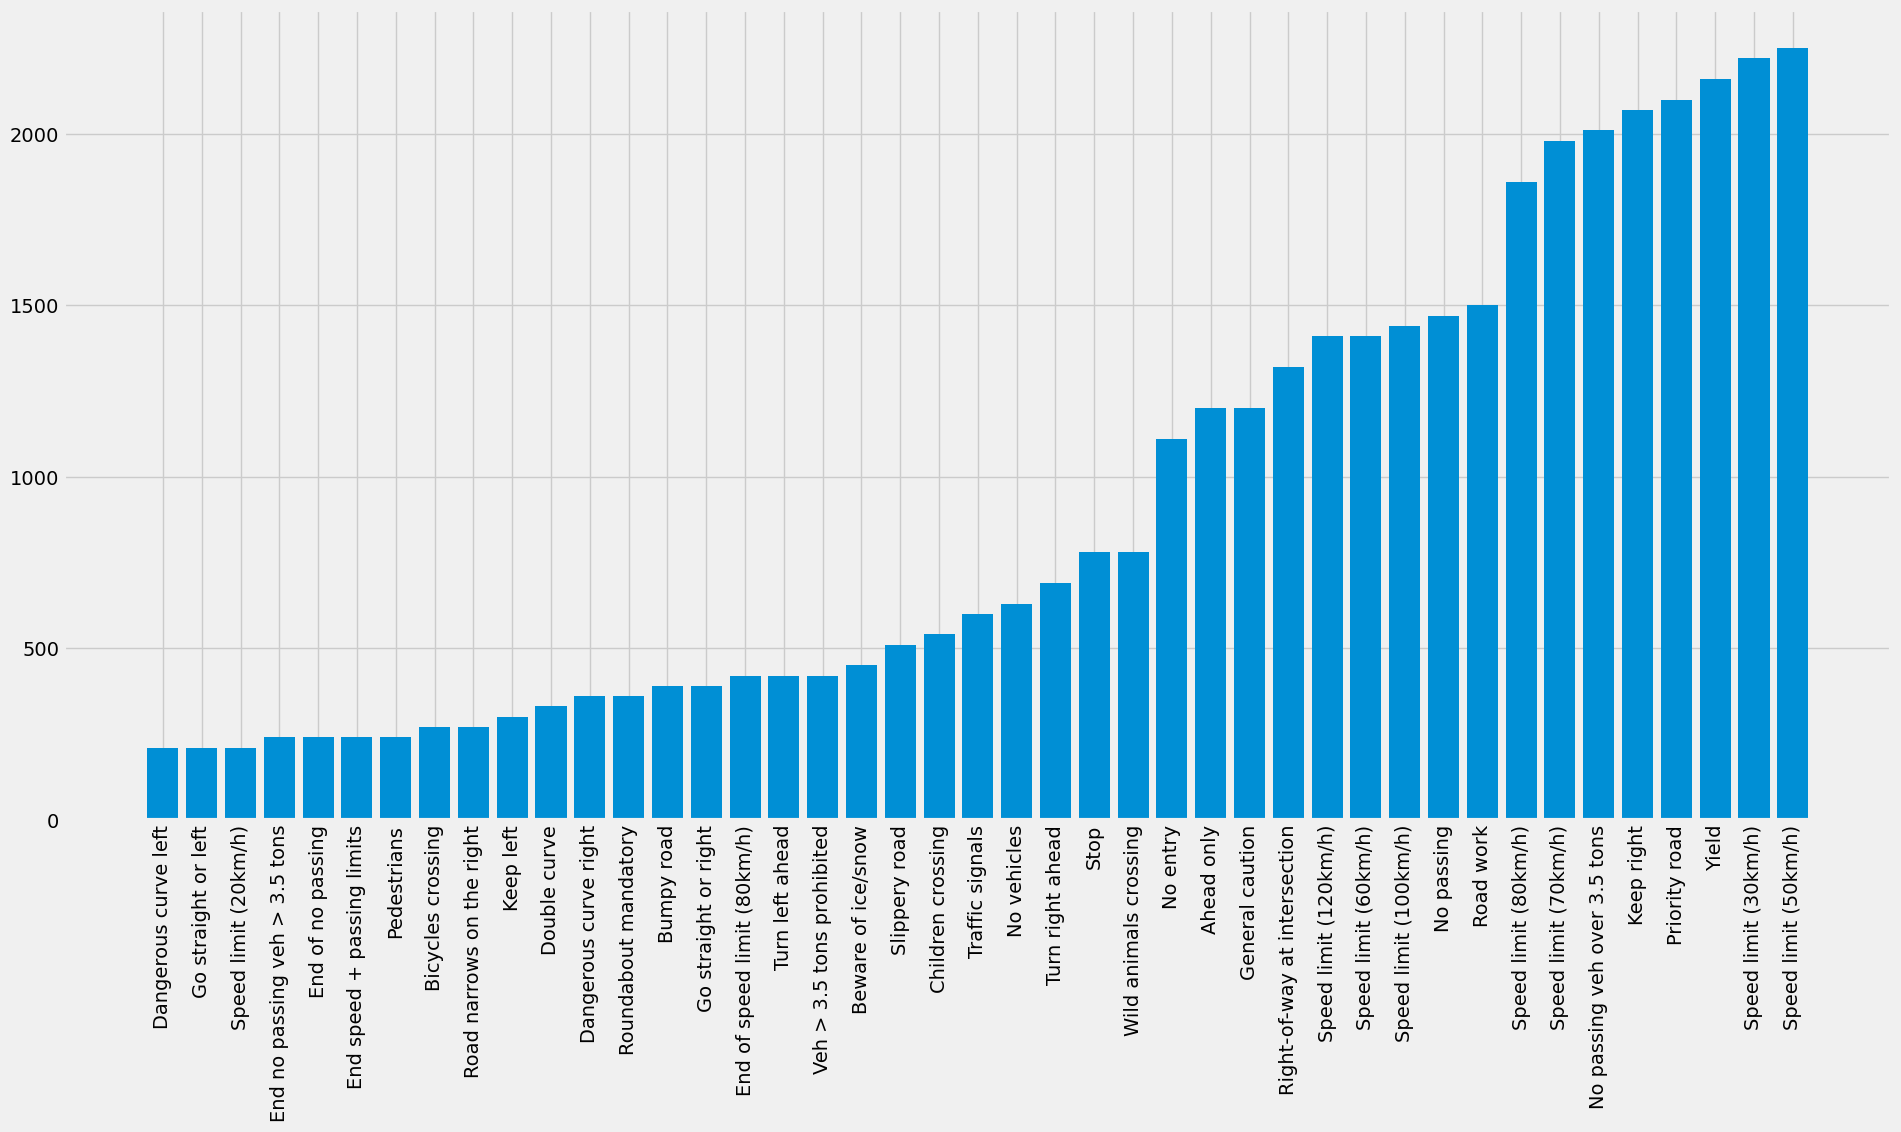

In [132]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

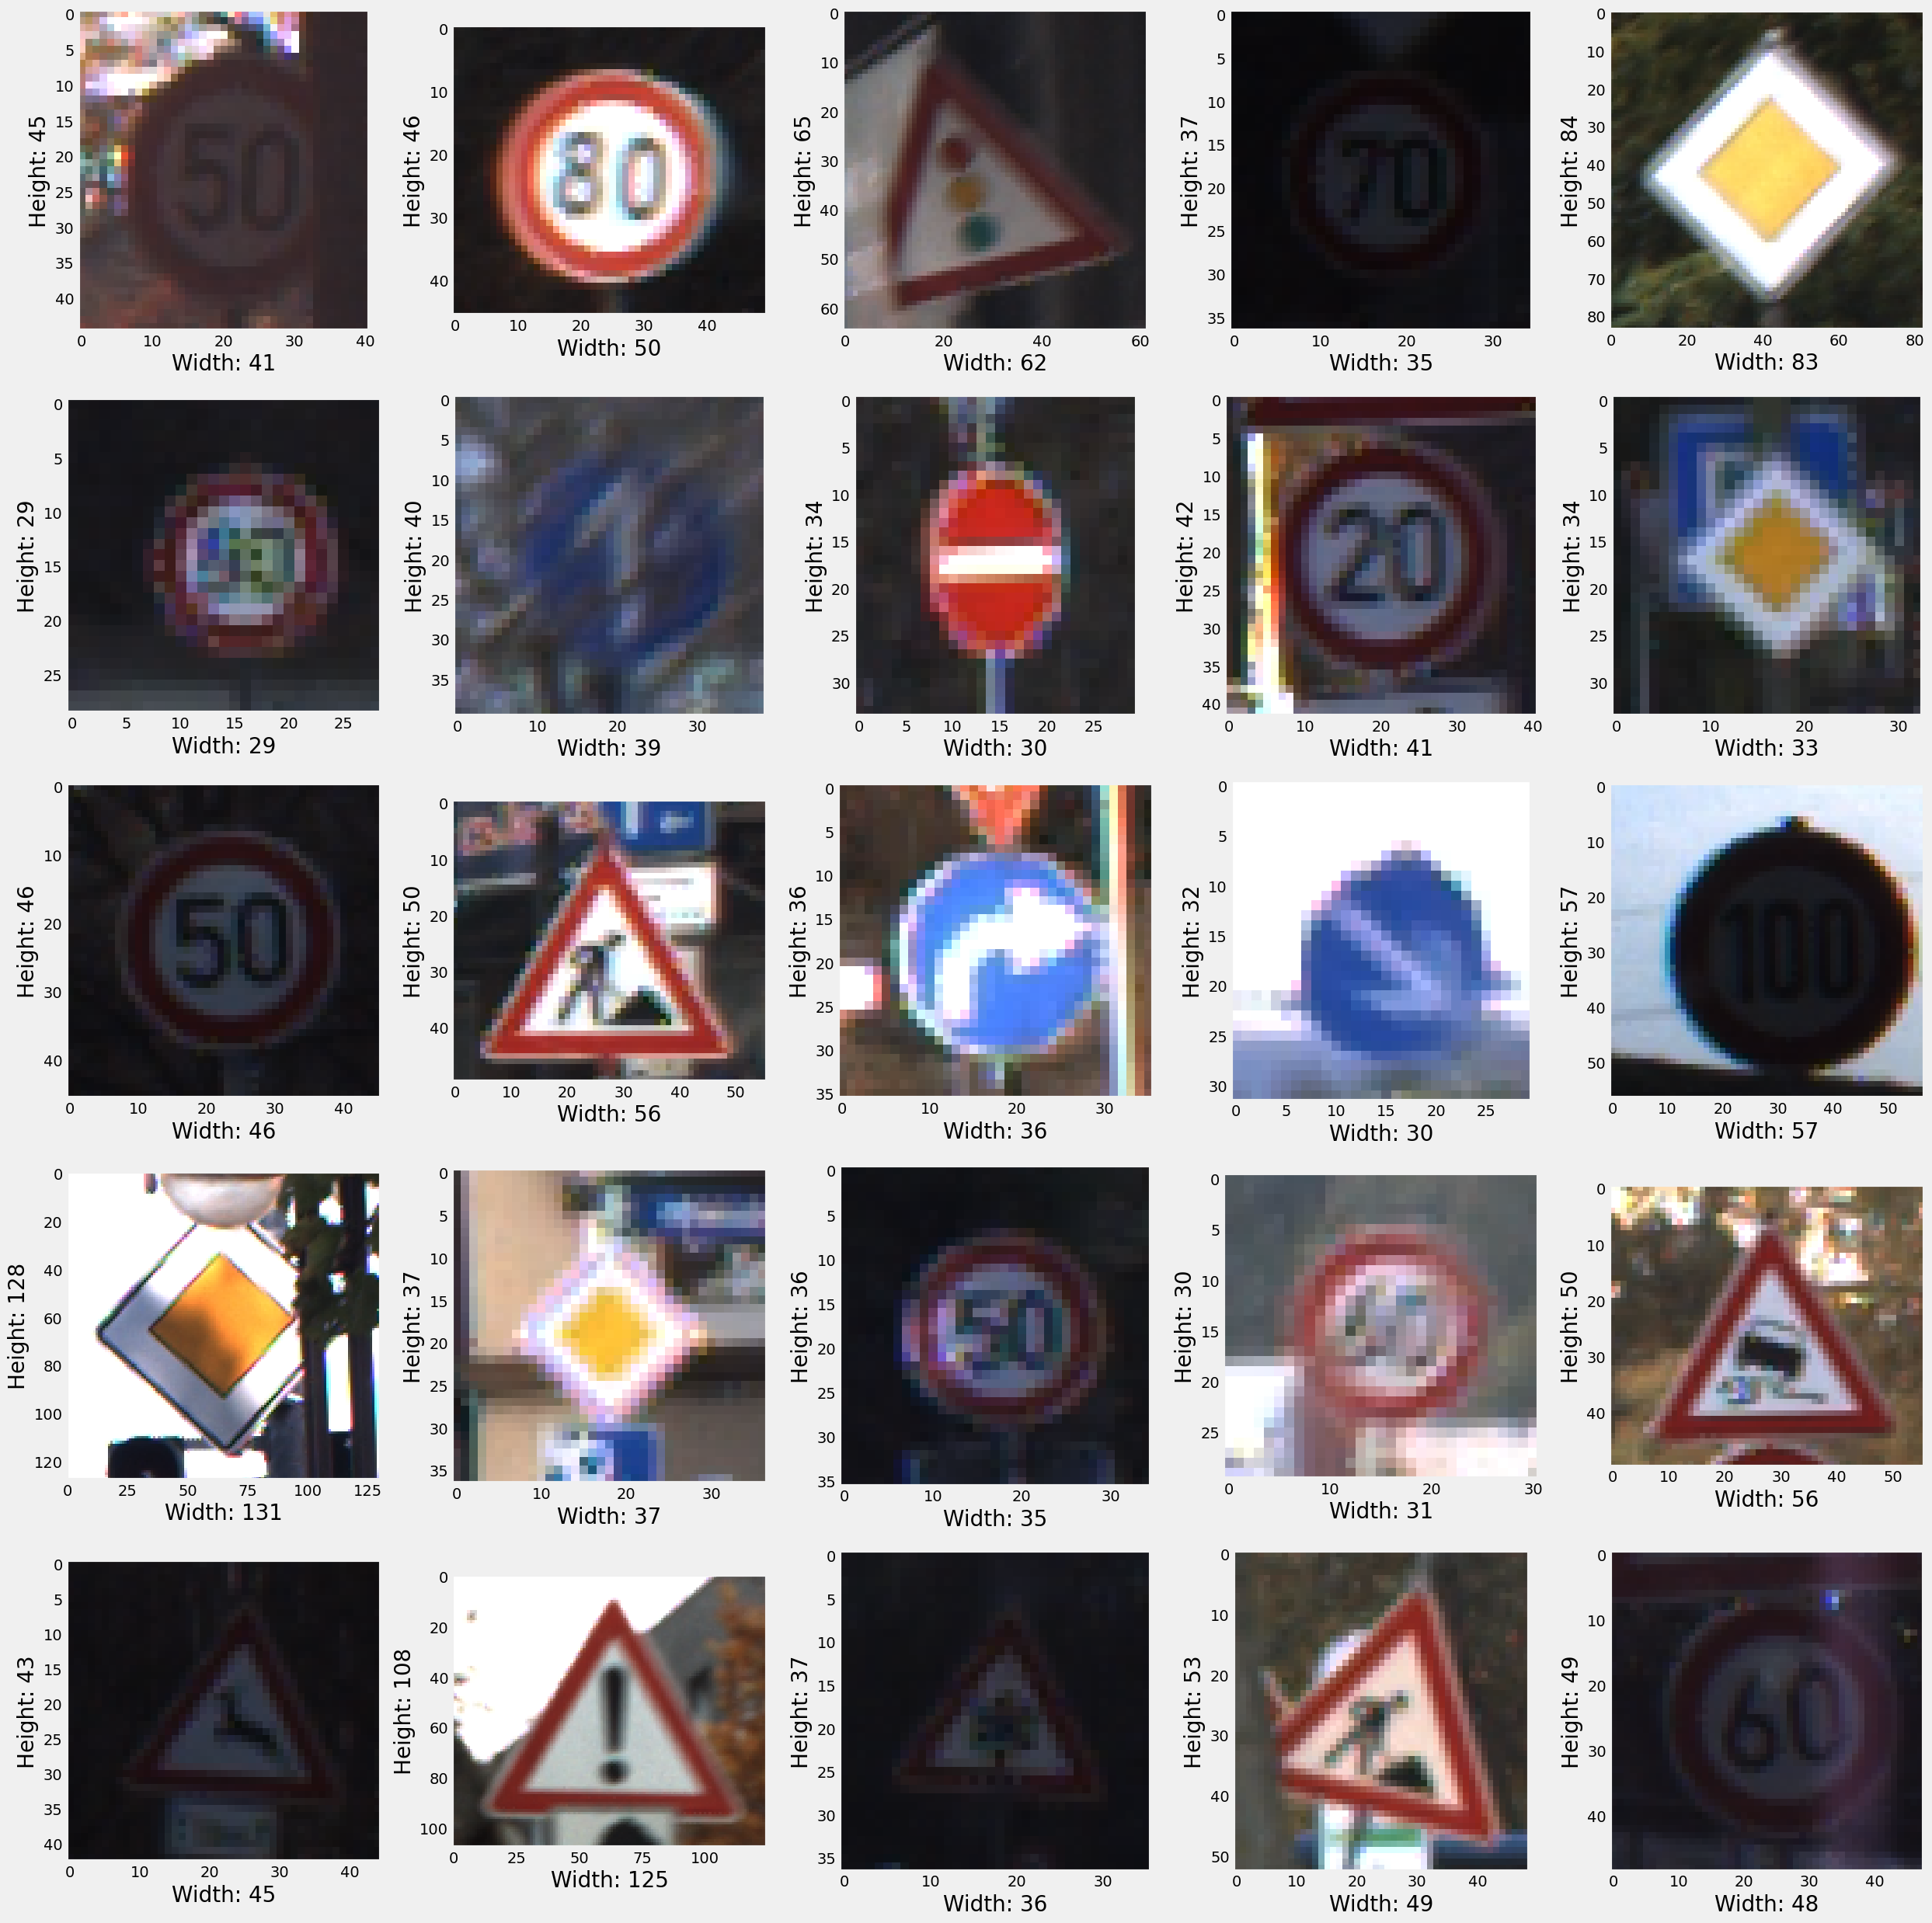

In [136]:
import random
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_dir' contains the path to the dataset directory
data_dir = r"C:\Users\Rangesh\Downloads\archive"
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

# Plot 25 random images from the test data
plt.figure(figsize=(25, 25))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=False)  # Disable grid
    plt.xlabel(f"Width: {rand_img.shape[1]}", fontsize=20)  # Width of image
    plt.ylabel(f"Height: {rand_img.shape[0]}", fontsize=20)  # Height of image

plt.tight_layout()
plt.show()


In [138]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [140]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [142]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [144]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [146]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

C:\Users\Rangesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
from tensorflow.keras.optimizers import Adam

lr = 0.001
epochs = 30

# Correct the argument for learning rate
opt = Adam(learning_rate=lr,decay=lr / (epochs * 0.5))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


C:\Users\Rangesh\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [158]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30


C:\Users\Rangesh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 48s 48ms/step - accuracy: 0.4804 - loss: 2.0897 - val_accuracy: 0.9632 - val_loss: 0.1161
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9329 - loss: 0.2168 - val_accuracy: 0.9739 - val_loss: 0.0804
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9633 - loss: 0.1200 - val_accuracy: 0.9797 - val_loss: 0.0656
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9655 - loss: 0.1092 - val_accuracy: 0.9878 - val_loss: 0.0384
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9758 - loss: 0.0796 - val_accuracy: 0.9863 - val_loss: 0.0481
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9781 - loss: 0.0753 - val_accuracy: 0.9946 - val_loss: 0.0174
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.9802 - loss: 0.0649 - val_accuracy: 0.9943 - val_loss: 0.0170
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.9835 - loss: 0.0520 - val_accurac

In [166]:
model.save("model.h5")


In [174]:
import shutil

# Specify the target directory
target_dir = r"C:\Users\Rangesh\Downloads\archive"

# Move the file
shutil.move("model.h5", target_dir)

print(f"Model saved to {target_dir}")


Model saved to C:\Users\Rangesh\Downloads\archive


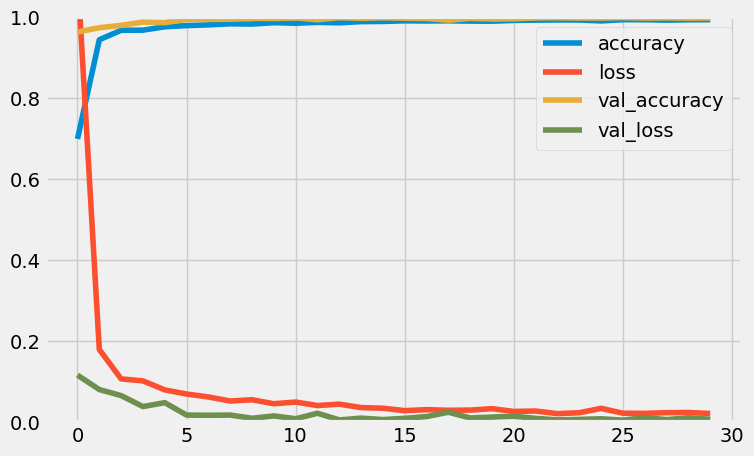

In [176]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [180]:
from sklearn.metrics import accuracy_score

# Load and preprocess test data
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)
X_test = X_test / 255.0

# Predict and convert probabilities to class indices
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=1)
    
# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred) * 100)


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Test Data accuracy:  97.67220902612827


In [182]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.98      1.00      0.99       720
           2       1.00      0.99      1.00       750
           3       1.00      0.92      0.96       450
           4       1.00      0.98      0.99       660
           5       0.93      0.99      0.96       630
           6       1.00      0.94      0.97       150
           7       0.94      1.00      0.97       450
           8       0.97      1.00      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      0.99      1.00       660
          11       0.90      0.99      0.94       420
          12       0.99      0.99      0.99       690
          13       1.00      0.99      1.00       720
          14       0.96      1.00      0.98       270
          15       1.00      1.00      1.00       210
          16       1.00      1.00      1.00       150
          17       1.00    

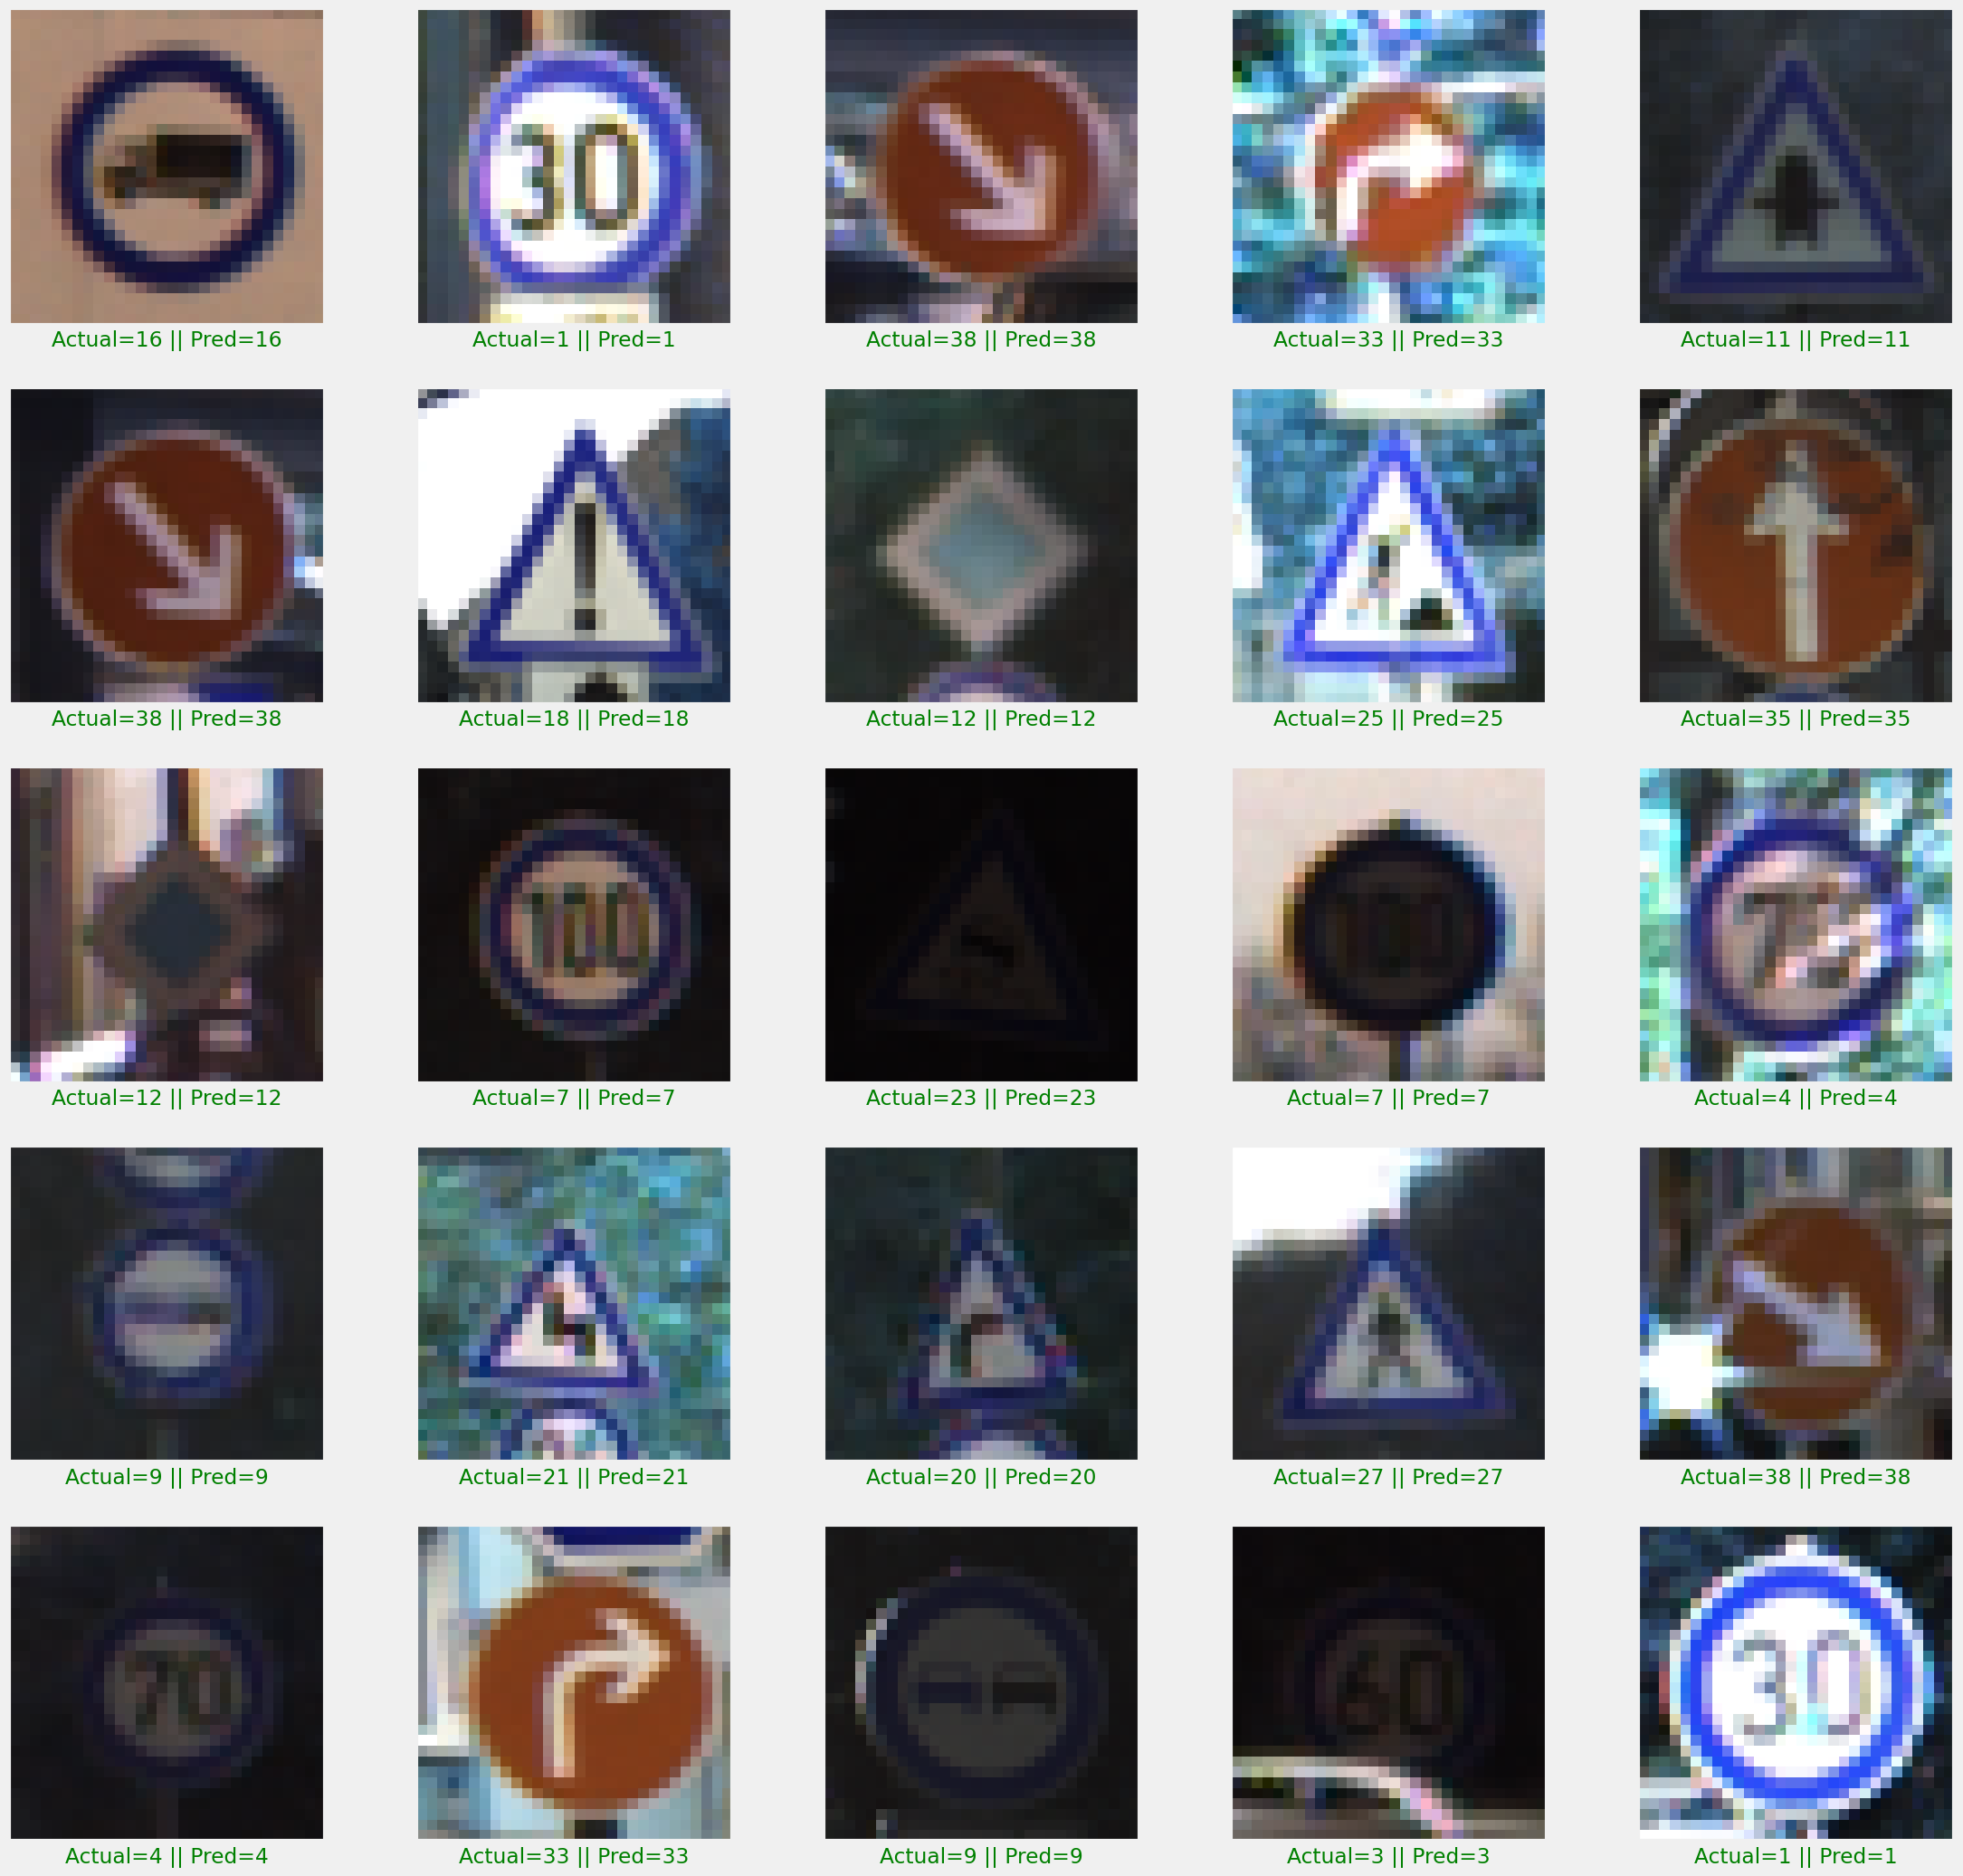

In [184]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()


In [196]:
import tensorflow as tf
import cv2
from PIL import Image
import numpy as np

# Load the saved model
model_path = r"C:\Users\Rangesh\Downloads\archive\model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Load and preprocess the image
image_path = r"C:\Users\Rangesh\Downloads\archive\german-traffic-sign-go-straight-260nw-249207982.webp"  # Raw string to avoid escape issues
image = cv2.imread(image_path)

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image, axis=0)
input_data = np.array(expand_input)
input_data = input_data / 255.0

# Make predictions
pred = loaded_model.predict(input_data)
result = pred.argmax()

print("Predicted Class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
Predicted Class: 37
